In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-dataset/training.1600000.processed.noemoticon.csv
/kaggle/input/sentiment-analysis-dataset/train.csv
/kaggle/input/sentiment-analysis-dataset/testdata.manual.2009.06.14.csv
/kaggle/input/sentiment-analysis-dataset/test.csv


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')

In [67]:
df = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/training.1600000.processed.noemoticon.csv',delimiter=',', encoding='ISO-8859-1')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048572 entries, 0 to 1048571
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   polarity of tweet   1048572 non-null  int64 
 1   id of the tweet     1048572 non-null  int64 
 2   date of the tweet   1048572 non-null  object
 3   query               1048572 non-null  object
 4   user                1048572 non-null  object
 5   text of the tweet   1048572 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [14]:
df.isnull().sum()

polarity of tweet     0
id of the tweet       0
date of the tweet     0
query                 0
user                  0
text of the tweet     0
dtype: int64

Simplify the data

In [88]:
df.columns=['sentiment','id','date','query','username','text']

In [19]:
df.head()

,sentiment,id,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [20]:
df['sentiment'].value_counts()

0    799996
4    248576
Name: sentiment, dtype: int64

In [21]:
df.shape

(1048572, 6)

Analysis

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='sentiment', ylabel='Count'>

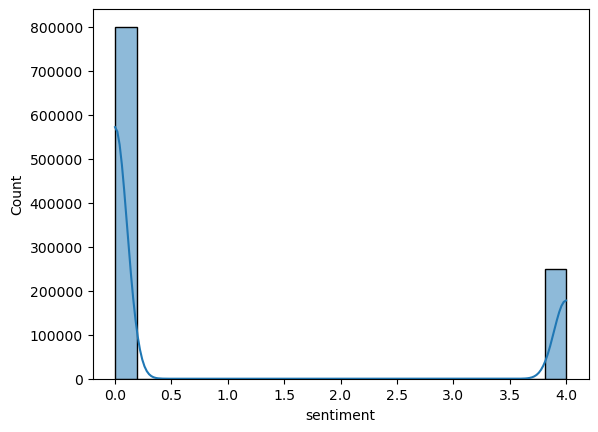

In [23]:
sns.histplot(df['sentiment'],kde=True)

<AxesSubplot:ylabel='count'>

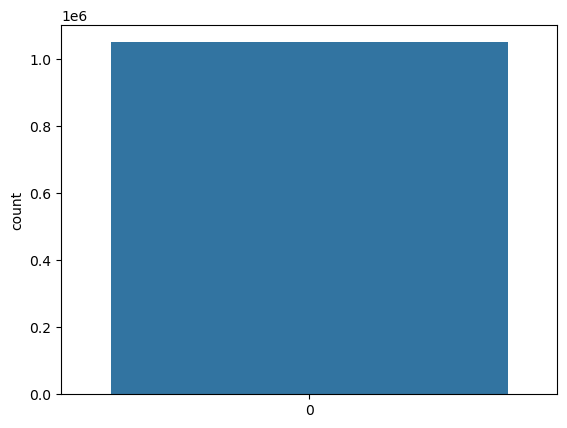

In [33]:
sns.countplot(df['sentiment'])

In [34]:
df['query'].value_counts()

NO_QUERY    1048572
Name: query, dtype: int64

dropping unnecessary columns

In [35]:
df=df.drop(columns=['query','id'])

In [36]:
df.head ()

,sentiment,date,username,text
0,0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,0,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,0,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew


In [38]:
texts = df['text']

In [39]:
text_lens = [len(t.split()) for t in texts.values]
len_mean = np.mean(text_lens)

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


In [44]:
# Créer les vecteurs de mots
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])

In [47]:
# Diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.2)


In [48]:
# Entraîner le modèle de classification
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [51]:
# Prédire les sentiments pour l'ensemble de test
y_pred = clf.predict(X_test)

In [52]:
# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8316524807476814


In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
# Entraîner le modèle de classification
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [59]:
# Prédire les sentiments pour l'ensemble de test
y_pred = clf.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8470495672698662


In [62]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
 !pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 48.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 6.9 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4711 sha256=554b8128cd1180265fa1c7a33558f1d998ba60a2feb8c3decc062e58a8aebb45
  Stored in directory: /root/.cache/pip/wheels/c0/96/80/1aeaaf27265398a7393b296714b84e51a7d00101f8a665a25a
Successfully built ffmpy


In [93]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import gradio as gr

# Télécharger les packages nécessaires de NLTK
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [94]:
def predict_sentiment(text):
    X_input = vectorizer.transform([text])
    prediction = clf.predict(X_input)
    return prediction[0]

In [95]:
# Définir la fonction pour l'interface Gradio
def predict_sentiment(text):
    # Prétraiter le texte entré par l'utilisateur
    text = ' '.join([word.lower() for word in text.split() if word.lower() not in stop_words])
    # Transformer le texte en vecteur de mots
    X_input = vectorizer.transform([text])
    # Prédire le sentiment correspondant
    prediction = clf.predict(X_input)
    return prediction[0]

# Définir l'interface Gradio
iface = gr.Interface(fn=predict_sentiment, 
                     inputs=gr.inputs.Textbox(label="Entrez votre texte ici"), 
                     outputs="text",
                     title="Analyse de sentiment",
                     description="Ce modèle prédit le sentiment (positif ou négatif) d'un texte donné en utilisant des vecteurs de mots avec des n-grammes de taille 1, 2 et 3 et une limite de 5000 fonctionnalités.")
                     
# Lancer l'interface Gradio
iface.launch()

Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Running on local URL:  http://127.0.0.1:7864
Running on public URL: https://55e204a174884d3af9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [97]:
texts = df['text']

In [98]:
text_lens = [len(t.split()) for t in texts.values]
len_mean = np.mean(text_lens)

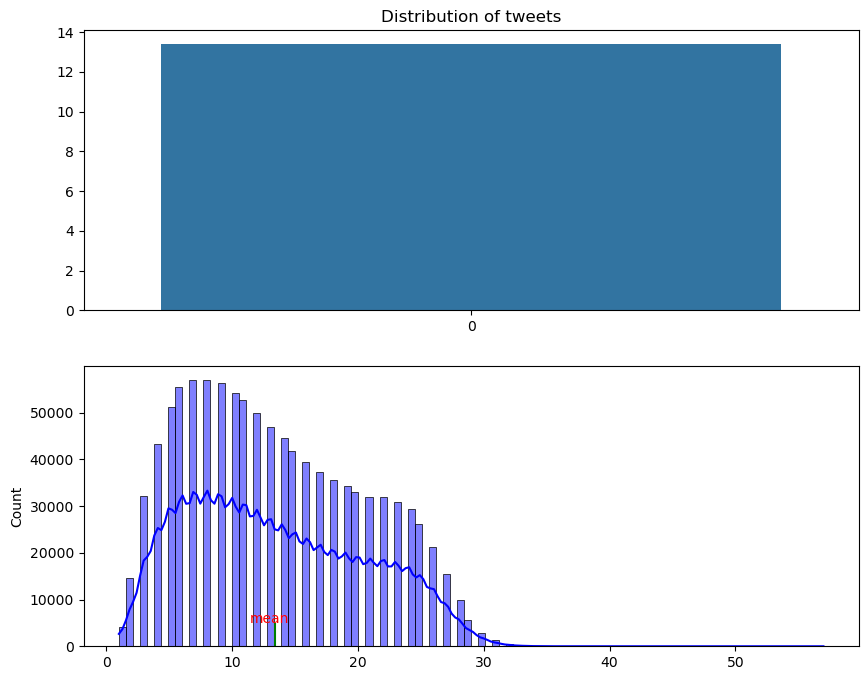

In [99]:
fig, axes = plt.subplots(2,1, figsize=(10, 8))
axes[0].set_title('Distribution of tweets')
sns.barplot(text_lens, ax=axes[0])
sns.histplot(text_lens,bins=100, kde=True, ax=axes[1],color='blue')
axes[1].vlines(len_mean, 0, 5000, color = 'g')
plt.annotate("mean", xy=(len_mean, 5000), xytext=(len_mean-2, 5050),color='r')
plt.show()

In [114]:
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()
corpus = df['text'].tolist()
print(len(corpus))
print(corpus[0])

1048572
is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
